## Extract the Stock Data

In [1]:
import pandas
import nsepy
from nsepy import get_history
import pypfopt
import datetime
import matplotlib
import seaborn
from matplotlib import pyplot
from datetime import date
pyplot.style.use('dark_background')
pyplot.style.use('seaborn-bright')

In [2]:
stock1 = input(str())

ASTRAL


In [3]:
stock2 = input(str())

RELIANCE


In [4]:
stock3 = input(str())

INFY


In [5]:
stocks_to_buy = [stock1,stock2,stock3]

In [6]:
stocks = pandas.DataFrame()

In [7]:
for elements in stocks_to_buy:
    stocks[elements] = get_history(symbol= elements,
                                   start = date(2015,1,1),
                                   end = date(2021,10,1))["Close"]

In [8]:
stocks

,ASTRAL,RELIANCE,INFY
Date,,,
2015-01-01,389.15,887.90,1974.40
2015-01-02,386.70,885.55,2013.20
2015-01-05,380.55,875.85,1995.90
2015-01-06,366.90,836.10,1954.20
2015-01-07,362.75,854.30,1963.55
...,...,...,...
2021-09-27,2104.75,2524.45,1721.15
2021-09-28,2104.05,2548.05,1687.10
2021-09-29,2143.35,2527.85,1692.25


## Efficient Frontier Allocation

In [9]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt import plotting

In [10]:
mu = expected_returns.mean_historical_return(stocks)
s = risk_models.sample_cov(stocks)

OrderedDict([('ASTRAL', 0.66695), ('RELIANCE', 0.33305), ('INFY', 0.0)])
Expected annual return: 25.6%
Annual volatility: 29.4%
Sharpe Ratio: 0.80


(0.2559229967113581, 0.2941082384353357, 0.8021638494945781)

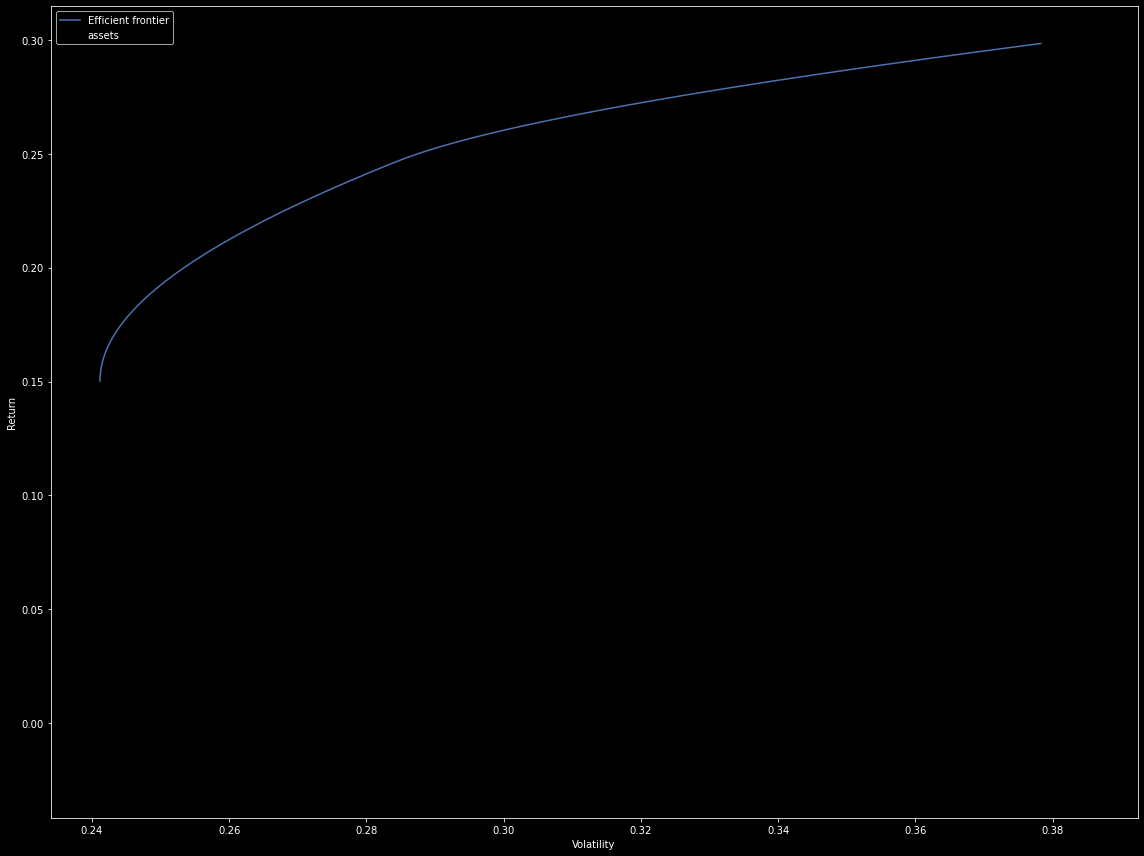

In [11]:
ef = EfficientFrontier(mu,s)
pyplot.figure(figsize = (16,12))
plotting.plot_efficient_frontier(ef)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose= True)

In [12]:
from pypfopt.discrete_allocation import DiscreteAllocation
from pypfopt.discrete_allocation import get_latest_prices

In [13]:
# Amount you want to invest in the Portfolio
portfolio_value = int(input())

20000


In [14]:
latest_prices = get_latest_prices(stocks)
weights = cleaned_weights
da = DiscreteAllocation(weights , latest_prices , portfolio_value)
allocation,leftover = da.lp_portfolio()

In [15]:
print("""

Allocation of Stocks : {0}

Amount Invested : {1}

Amount Remaining : {2}""".format(allocation,(portfolio_value - leftover), leftover))



Allocation of Stocks : {'ASTRAL': 6, 'RELIANCE': 2}

Amount Invested : 18246.2

Amount Remaining : 1753.7999999999993
